# Exercise 7:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework datasets/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [1]:
# If you are running this on your local computer, set your workign directory to 
# the location of the lexDat data by setting your harddrive. Uncomment this line
# and change the location to where it is on your computer. 
setwd("C:/Users/roman/OneDrive/Documents/Python Scripts/Lapadat_DSPN_S22/book/exercises/unrestricted_trimmed_1_7_2020_10_50_44")

# If you are running this on Colab, then use something like this.
#system("gdown --id 1hywRmGdvhbDYTrQRyl1_bLJsq-T3GJq2")

# INSERT CODE HERE
library(tidyverse)

data  <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")
head(data)

d1  <- data %>%
    select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
    na.omit()

head(d1)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
2,100206,M,130.42,543134,807245
3,100307,F,112.56,407292,664124
4,100408,M,121.18,500417,726206
5,100610,M,126.53,512946,762308
6,101006,F,101.85,429449,579632
7,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

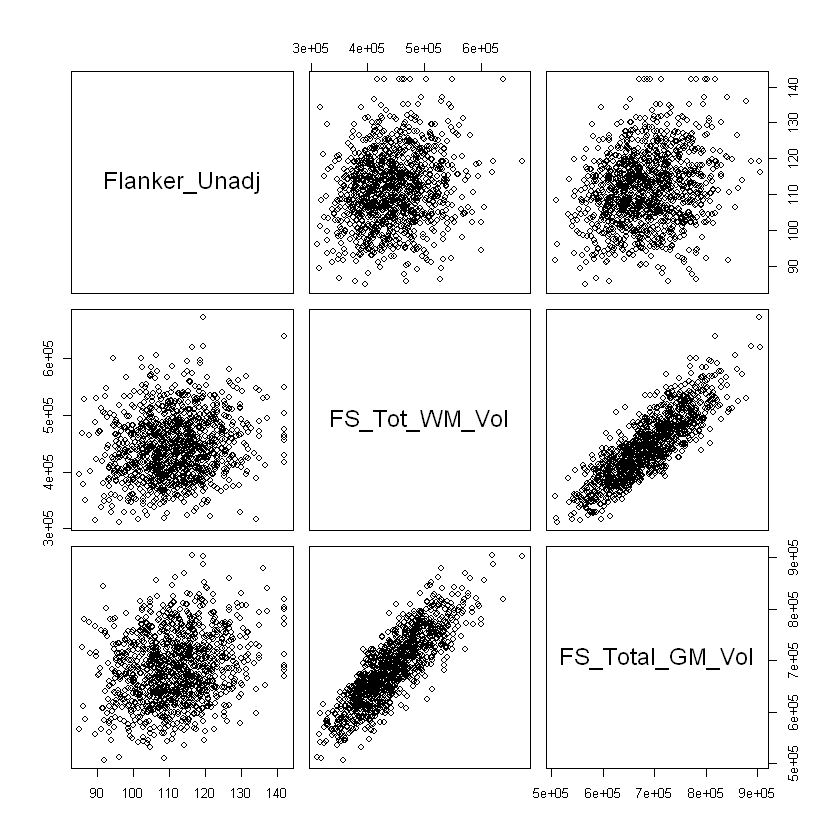

In [2]:
#INSERT CODE HERE

pairs(d1 %>% select(Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol)) 

> *Write your response here.* 
> Total gray matter volume and white matter volume have a strong positive correlation. Flanker task performance appears to have no correlation with white matter volume, but appears to be weakly positively correlated with total gray matter volume.

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [3]:
#INSERT CODE HERE
linear_model  <- lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)
#linear_model

summary(linear_model)
coef(linear_model)
confint(linear_model)


Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> *Write your response here.* 
>
>beta(0) = 90.2564608190944, beta(1) = 3.10996547106465e-05
>
>
>
> *Yes, as the p-value resulting from the t-test between FS_Total_GM_Vol and Flanker Task performance is significant (<0.001).*

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see. 

`geom_smooth()` using formula = 'y ~ x'


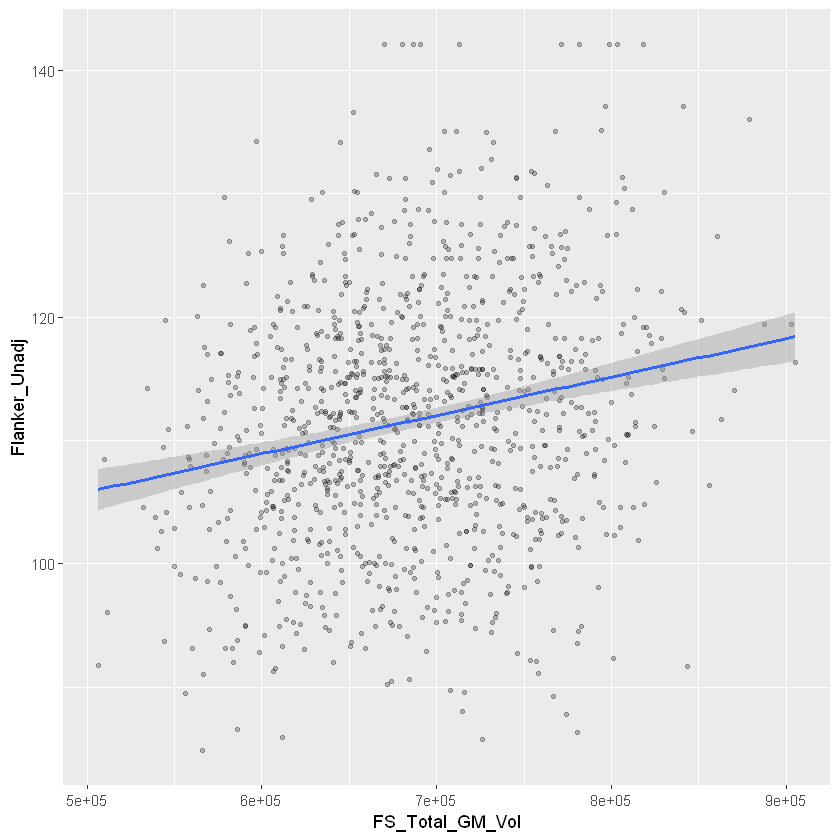

In [4]:
#INSERT CODE HERE

plot  <- ggplot(d1, aes(y = Flanker_Unadj, x = FS_Total_GM_Vol)) +
    geom_point(size = 1, alpha = 0.25) +
    geom_smooth(method = 'lm')
    

plot

> *Write your response here.* 
> 
>When Flankeer Task performance and total grey matter volume are plotted against each other, the data seems pretty evenly spread. As we look closer, the LM seems to be mediating between the denser concentration of points in the middle of the chart. It also looks like we're seeing some supgroups pop up with dense concentrations of points, although more analysis would be needed (e.g. through using a mixed effects model, if I'm applying that correctly here). The slope of the line appears small. As we would expect, the CI narrows where more data is present.

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> *Write your response here.* 
>
>The lm tells us these variables are very strongly correlated (p = 2e-16***). However, the spread of the plot data is very wide, so wide that I wouldn't expect that just by looking at it. Together, these things tell me that although the two are highly correlated, the strength of that correlation is weak-medium. So even though the two are correlated, it's clear that there are other predictors underlie flanker task performance, and we have to keep looking for those. It certainly seems to imply that gray matter volume by itself is not a strong predictor of how good people are at suppressing inappropriate responses.

**DUE:** 5pm EST, February 27, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*